# FINAL PROJECT

Thanks to the Data Squirrels for the inital work on the Federal Fleet Data!

[End of Gas powered vehicles in 2035?](https://www.autonews.com/regulation-safety/biden-orders-end-gasoline-powered-vehicle-purchases-federal-fleet-2035)


## LOAD LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind

## IMPORT DATA

In [2]:
FuelCTY_2011 = pd.read_excel("Federal-Fleet-data/FY2011-FFR_Tables_FINAL.xlsx")
FuelCTY_2012 = pd.read_excel("Federal-Fleet-data/FY2012-Federal_Fleet_Report.xls")
FuelCTY_2013 = pd.read_excel("Federal-Fleet-data/FY2013-Federal_Fleet_Report.xlsx")
FuelCTY_2014 = pd.read_excel("Federal-Fleet-data/FY2014-Federal_Fleet_Open_Data_Set.xlsx")
FuelCTY_2015 = pd.read_excel("Federal-Fleet-data/FY2015-Federal_Fleet_Open_Data_Set_-_20160302.xlsx")
FuelCTY_2016 = pd.read_excel("Federal-Fleet-data/FY2016-Federal_Fleet_Data.xlsx")
FuelCTY_2017 = pd.read_excel("Federal-Fleet-data/FY2017-Federal_Fleet_Data1.xlsx")
FuelCTY_2018 = pd.read_excel("Federal-Fleet-data/FY2018-Federal_Fleet_Data_Set_8-14-2019.xlsx")
FuelCTY_2019 = pd.read_excel("Federal-Fleet-data/FY2019-FederalFleetReportFinal.xlsx")
FuelCTY_2020 = pd.read_excel("Federal-Fleet-data/FY2020-FederalFleetReport.xlsx")

## DATA WRANGLING AND CLEAN UP <BR> <FONT SIZE = 2> - WEEK 2 -

### VIEW DATA

**Set Up display:**

In [3]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

**View display:**

In [4]:
display('FuelCTY_2011', 'FuelCTY_2012', 'FuelCTY_2013', 'FuelCTY_2014', 'FuelCTY_2015', 
        'FuelCTY_2016', 'FuelCTY_2017', 'FuelCTY_2018', 'FuelCTY_2019', 'FuelCTY_2020')

,"INDEX OF DATA FILES, FEDERAL FLEET REPORT FOR FY 2011",Unnamed: 1
0,NaN,NaN
1,Each section of the Report focuses on a specif...,NaN
2,with Section 1 providing an overall summary.,NaN
3,"Unless otherwise marked, each table is a snaps...",NaN
4,"Tables with a ""T"" appended to the filename are...",NaN
...,...,...
66,Table 5-2T,Fuel Cost by Fuel Type by Year
67,Table 5-3,Vehicle Inventory by Fuel Type
68,Table 5-3T,Vehicle Inventory by Fuel Type by Year
69,Table 5-4,Vehicle Acquisitions by Fuel Type


**NOTES** <br> Dataframes (dfs) *FuelCTY_2011* through *FuelCTY_2017* do not include a 'Renewable Diesel' row, but values for 'Renewable Diesel' in *FY2016* and *FY2017* are available in df *FuelCTY_2018*. All other data/values are identical between *FuelCTY_2016*, *FuelCTY_2017*, and *FuelCTY_2018*. 'Renewable Diesel' values remain the same, where available, between dfs *FuelCTY_2018* through *FuelCTY_2020*. Remove dfs *FuelCTY_2016* & *FuelCTY_2017* and include data for columns *FY2016* and *FY2017* found in *FuelCTY_2018*.

### REMOVE UNWANTED DATA

**Remove Unwanted Column(s) For Each Dataset:**

In [36]:
# FuelCTY_2012 (Drop FY2008-FY2011)
FuelCTY_2012.drop(['FY2008', 'FY2009', 'FY2010', 'FY2011'], axis=1, inplace=True)

In [37]:
# FuelCTY_2013 (Remove FY2009-FY2012)
FuelCTY_2013.drop(['FY2009', 'FY2010', 'FY2011', 'FY2012'], axis=1, inplace=True)

In [38]:
# FuelCTY_2014 (Remove FY2010-FY2013)
FuelCTY_2014.drop(['FY2010', 'FY2011', 'FY2012', 'FY2013'], axis=1, inplace=True)

In [39]:
# FuelCTY_2015 (Remove FY2011-FY2014)
FuelCTY_2015.drop(['FY2011', 'FY2012', 'FY2013', 'FY2014'], axis=1, inplace=True)

In [40]:
# FuelCTY_2018 (Remove FY2014-FY2015)
FuelCTY_2018.drop(['FY2014', 'FY2015'], axis=1, inplace=True)

In [41]:
# FuelCTY_2019 (Remove FY2015-FY2018)
FuelCTY_2019.drop(['FY2015', 'FY2016', 'FY2017', 'FY2018'], axis=1, inplace=True)

In [42]:
# FuelCTY_2020 (Drop FY2008-FY2011)
FuelCTY_2020.drop(['FY2016', 'FY2017', 'FY2018', 'FY2019'], axis=1, inplace=True)

**View New df.head():**

In [43]:
display('FuelCTY_2011.head()', 'FuelCTY_2012.head()', 'FuelCTY_2013.head()', 'FuelCTY_2014.head()', 'FuelCTY_2015.head()', 
        'FuelCTY_2018.head()', 'FuelCTY_2019.head()', 'FuelCTY_2020.head()')

FuelCTY_2011.head()
          Fuel Type     FY2007     FY2008     FY2009     FY2010      FY2011
0          Gasoline  783761428  993113060  704701670  939024355  1046695346
1            Diesel  166669168  234969146  163984575  213360941   248901198
2  Biodiesel (B100)      27136       3519      15154        592      211104
3   Biodiesel (B20)   19893549   23323241   17477704   19255051    24822915
4               CNG    1652376    1562366    1098131    1178322     1116769

FuelCTY_2012.head()
          Fuel Type      FY2012
0          Gasoline  1032343390
1            Diesel   230639155
2  Biodiesel (B100)      772544
3   Biodiesel (B20)    20040238
4               CNG      876725

FuelCTY_2013.head()
          Fuel Type      FY2013
0          Gasoline  1027624612
1            Diesel   215654629
2  Biodiesel (B100)     1269486
3   Biodiesel (B20)    18586916
4               CNG     1265507

FuelCTY_2014.head()
          Fuel Type     FY2014
0          Gasoline  991355633
1            Diesel  201669193
2  Biodiesel (B100)      63221
3   Biodiesel (B20)   17579723
4               CNG     596033

FuelCTY_2015.head()
          Fuel Type     FY2015
0          Gasoline  800741336
1            Diesel  164743823
2  Biodiesel (B100)      43407
3   Biodiesel (B20)   13401410
4               CNG     581175

FuelCTY_2018.head()
          Fuel Type     FY2016     FY2017     FY2018
0          Gasoline  646906370  570420144  666101480
1            Diesel  133127205  124896971  120375142
2  Biodiesel (B100)        641     404961     349124
3   Biodiesel (B20)    9370698    8507338    8858454
4  Renewable Diesel      41343     727396    1178544

FuelCTY_2019.head()
          Fuel Type     FY2019
0          Gasoline  640042454
1            Diesel  134079902
2  Biodiesel (B100)      97596
3   Biodiesel (B20)    6118243
4  Renewable Diesel    1321191

FuelCTY_2020.head()
          Fuel Type     FY2020
0          Gasoline  588118878
1            Diesel  130134685
2  Biodiesel (B100)      76301
3   Biodiesel (B20)    2128088
4  Renewable Diesel     323000

### MERGE DATASETS

In [44]:
FuelCTY9 = pd.merge(FuelCTY_2011, FuelCTY_2012)
FuelCTY8 = pd.merge(FuelCTY9, FuelCTY_2013)
FuelCTY7 = pd.merge(FuelCTY8, FuelCTY_2014)
FuelCTY6 = pd.merge(FuelCTY7, FuelCTY_2015)
FuelCTY5 = pd.merge(FuelCTY6, FuelCTY_2018, how='outer')
FuelCTY4 = pd.merge(FuelCTY5, FuelCTY_2019)
FuelCTY3 = pd.merge(FuelCTY4, FuelCTY_2020)

**View Merged Dataframe:**

In [45]:
FuelCTY3.head()

,Fuel Type,FY2007,FY2008,FY2009,FY2010,FY2011,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020
0,Gasoline,783761428,993113060,704701670,939024355,1046695346,1032343390,1027624612,991355633,800741336,646906370,570420144,666101480,640042454,588118878
1,Diesel,166669168,234969146,163984575,213360941,248901198,230639155,215654629,201669193,164743823,133127205,124896971,120375142,134079902,130134685
2,Biodiesel (B100),27136,3519,15154,592,211104,772544,1269486,63221,43407,641,404961,349124,97596,76301
3,Biodiesel (B20),19893549,23323241,17477704,19255051,24822915,20040238,18586916,17579723,13401410,9370698,8507338,8858454,6118243,2128088
4,CNG,1652376,1562366,1098131,1178322,1116769,876725,1265507,596033,581175,529605,497940,367975,164113,268321


**Remove unwanted row "Grand Total ":**

In [46]:
FuelCTY3.drop([10], inplace=True)
FuelCTY3.tail()

,Fuel Type,FY2007,FY2008,FY2009,FY2010,FY2011,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020
6,Ethanol/E-85,12366606,24954830,23071572,26392840,38496662,50545128,63169505,55846705,45429665,32740325,10639295,16834771,12387912,7995187
7,LNG,151190,119055,69933,570,648,112,5036,13520,32174,18859,1337,113,1066,875
8,LPG,479223,491119,341874,292968,477127,359107,948317,430616,395569,227237,289015,342005,334621,145953
9,Hydrogen,0,224,14657,20509,17513,4118,3741,2208,2821,0,0,106,780,0
11,Renewable Diesel,nan,nan,nan,nan,nan,nan,nan,nan,nan,41343,727396,1178544,1321191,323000


### GATHERING THOSE LAST FEW CHESTNUTS...

**Replace NaN Values With 0:**

In [47]:
FuelCTY2 = FuelCTY3.fillna(0)
FuelCTY2.head()

,Fuel Type,FY2007,FY2008,FY2009,FY2010,FY2011,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020
0,Gasoline,783761428,993113060,704701670,939024355,1046695346,1032343390,1027624612,991355633,800741336,646906370,570420144,666101480,640042454,588118878
1,Diesel,166669168,234969146,163984575,213360941,248901198,230639155,215654629,201669193,164743823,133127205,124896971,120375142,134079902,130134685
2,Biodiesel (B100),27136,3519,15154,592,211104,772544,1269486,63221,43407,641,404961,349124,97596,76301
3,Biodiesel (B20),19893549,23323241,17477704,19255051,24822915,20040238,18586916,17579723,13401410,9370698,8507338,8858454,6118243,2128088
4,CNG,1652376,1562366,1098131,1178322,1116769,876725,1265507,596033,581175,529605,497940,367975,164113,268321


**Row 11 reindex:**

In [48]:
FuelCTY1 = FuelCTY2.reindex([0, 1, 2, 3, 11, 4, 5, 6, 7, 8, 9])
FuelCTY1.head()

,Fuel Type,FY2007,FY2008,FY2009,FY2010,FY2011,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020
0,Gasoline,783761428,993113060,704701670,939024355,1046695346,1032343390,1027624612,991355633,800741336,646906370,570420144,666101480,640042454,588118878
1,Diesel,166669168,234969146,163984575,213360941,248901198,230639155,215654629,201669193,164743823,133127205,124896971,120375142,134079902,130134685
2,Biodiesel (B100),27136,3519,15154,592,211104,772544,1269486,63221,43407,641,404961,349124,97596,76301
3,Biodiesel (B20),19893549,23323241,17477704,19255051,24822915,20040238,18586916,17579723,13401410,9370698,8507338,8858454,6118243,2128088
11,Renewable Diesel,0,0,0,0,0,0,0,0,0,41343,727396,1178544,1321191,323000


**Remove Scientific Notation:**

In [49]:
pd.options.display.float_format = '{:.0f}'.format
FuelCTY1.head()

,Fuel Type,FY2007,FY2008,FY2009,FY2010,FY2011,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020
0,Gasoline,783761428,993113060,704701670,939024355,1046695346,1032343390,1027624612,991355633,800741336,646906370,570420144,666101480,640042454,588118878
1,Diesel,166669168,234969146,163984575,213360941,248901198,230639155,215654629,201669193,164743823,133127205,124896971,120375142,134079902,130134685
2,Biodiesel (B100),27136,3519,15154,592,211104,772544,1269486,63221,43407,641,404961,349124,97596,76301
3,Biodiesel (B20),19893549,23323241,17477704,19255051,24822915,20040238,18586916,17579723,13401410,9370698,8507338,8858454,6118243,2128088
11,Renewable Diesel,0,0,0,0,0,0,0,0,0,41343,727396,1178544,1321191,323000


## DATA EXPLORATION <BR> <FONT SIZE = 2> - WEEK 3 -

### HISTOGRAMS - What does the data look like?

array([[<AxesSubplot:title={'center':'FY2007'}>,
        <AxesSubplot:title={'center':'FY2008'}>,
        <AxesSubplot:title={'center':'FY2009'}>,
        <AxesSubplot:title={'center':'FY2010'}>],
       [<AxesSubplot:title={'center':'FY2011'}>,
        <AxesSubplot:title={'center':'FY2012'}>,
        <AxesSubplot:title={'center':'FY2013'}>,
        <AxesSubplot:title={'center':'FY2014'}>],
       [<AxesSubplot:title={'center':'FY2015'}>,
        <AxesSubplot:title={'center':'FY2016'}>,
        <AxesSubplot:title={'center':'FY2017'}>,
        <AxesSubplot:title={'center':'FY2018'}>],
       [<AxesSubplot:title={'center':'FY2019'}>,
        <AxesSubplot:title={'center':'FY2020'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

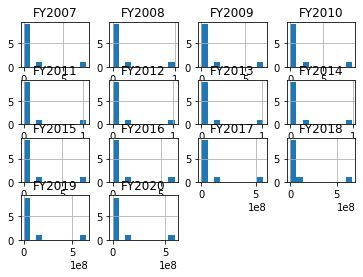

In [50]:
FuelCTY1.hist()

**CHANGE OVER TIME - FY2007 vs FY2020**

C:\Users\moonk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FY2007', ylabel='Density'>

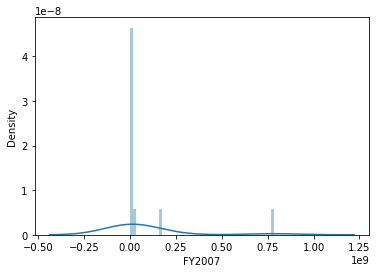

In [51]:
sns.distplot(FuelCTY1['FY2007'])

C:\Users\moonk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FY2020', ylabel='Density'>

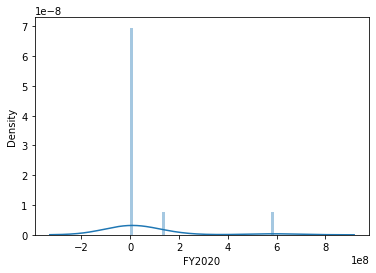

In [52]:
sns.distplot(FuelCTY1['FY2020'])

### TRANSFORMATION - Swapping columns and rows.

In [53]:
FuelCTY1.T.head()

,0,1,2,3,11,4,5,6,7,8,9
Fuel Type,Gasoline,Diesel,Biodiesel (B100),Biodiesel (B20),Renewable Diesel,CNG,Electric,Ethanol/E-85,LNG,LPG,Hydrogen
FY2007,783761428,166669168,27136,19893549,0,1652376,15670,12366606,151190,479223,0
FY2008,993113060,234969146,3519,23323241,0,1562366,26114,24954830,119055,491119,224
FY2009,704701670,163984575,15154,17477704,0,1098131,13539,23071572,69933,341874,14657
FY2010,939024355,213360941,592,19255051,0,1178322,387128,26392840,570,292968,20509


### INDEX - Set categorical info as column titles instead of numerical data.

In [54]:
FuelCTY_I = FuelCTY1.set_index('Fuel Type').T
FuelCTY_I.head()

Fuel Type,Gasoline,Diesel,Biodiesel (B100),Biodiesel (B20),Renewable Diesel,CNG,Electric,Ethanol/E-85,LNG,LPG,Hydrogen
FY2007,783761428,166669168,27136,19893549,0,1652376,15670,12366606,151190,479223,0
FY2008,993113060,234969146,3519,23323241,0,1562366,26114,24954830,119055,491119,224
FY2009,704701670,163984575,15154,17477704,0,1098131,13539,23071572,69933,341874,14657
FY2010,939024355,213360941,592,19255051,0,1178322,387128,26392840,570,292968,20509
FY2011,1046695346,248901198,211104,24822915,0,1116769,468852,38496662,648,477127,17513


### HISTOGRAMS - All indexed plots.

array([[<AxesSubplot:title={'center':'Gasoline'}>,
        <AxesSubplot:title={'center':'Diesel'}>,
        <AxesSubplot:title={'center':'Biodiesel (B100)'}>],
       [<AxesSubplot:title={'center':'Biodiesel (B20)'}>,
        <AxesSubplot:title={'center':'Renewable Diesel'}>,
        <AxesSubplot:title={'center':'CNG'}>],
       [<AxesSubplot:title={'center':'Electric'}>,
        <AxesSubplot:title={'center':'Ethanol/E-85'}>,
        <AxesSubplot:title={'center':'LNG'}>],
       [<AxesSubplot:title={'center':'LPG'}>,
        <AxesSubplot:title={'center':'Hydrogen'}>, <AxesSubplot:>]],
      dtype=object)

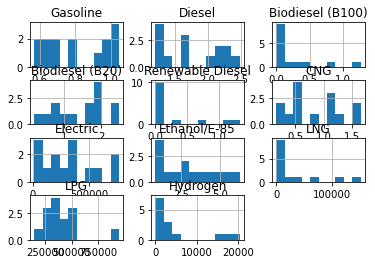

In [55]:
FuelCTY_I.hist()

### CLEAN UP - Add "Year" column header.

In [56]:
FuelCTY_I['Year']=FuelCTY_I.index

In [57]:
FuelCTY_M=pd.melt(FuelCTY_I, id_vars=['Year'])
FuelCTY_M.head()

,Year,Fuel Type,value
0,FY2007,Gasoline,783761428
1,FY2008,Gasoline,993113060
2,FY2009,Gasoline,704701670
3,FY2010,Gasoline,939024355
4,FY2011,Gasoline,1046695346


**PLOT - Can't have a good "story" without one...**

### HISTOGRAM - plot 'melted' index.

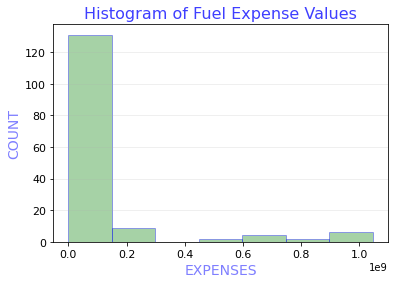

In [58]:
n, bins, patches = plt.hist(FuelCTY_M['value'],
                            facecolor='green',
                            edgecolor='blue',
                            alpha=.35,
                            bins=7)
plt.xlabel('EXPENSES', fontsize=14, color='blue', alpha=0.5)
plt.ylabel('COUNT', fontsize=14, color='blue', alpha=0.5)
plt.title('Histogram of Fuel Expense Values', color='blue', fontsize=16, alpha=0.75)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', alpha=0.25)
plt.show()

**BAR GRAPH - Visualizing fuel types over the years.**

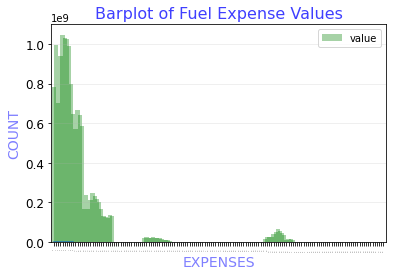

In [59]:
FuelCTY_M.plot(kind="bar",
               width=2,
               color="green",
               alpha=0.35)
plt.plot(range(10))
plt.title('Barplot of Fuel Expense Values',
          fontsize=16,
          color='blue',
          alpha=0.75)
plt.xlabel('EXPENSES',
           fontsize=14,
           color='blue',
           alpha=0.5)
plt.ylabel('COUNT',
           fontsize=14,
           color='blue',
           alpha=0.5)
plt.xticks(fontsize=0,
           rotation = 90)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.25)
plt.show()

## DATA ANALYSIS <br> <FONT SIZE = 2> - WEEK 4 -

### QUESTION 1:  <BR> <FONT SIZE = 2> Is there significant difference overall in the expense of the alternative fuels compared to Gasoline?

### NULL HYPOTHESIS/ASSUMPTION  <BR> <FONT SIZE = 2> Gasoline expense is no different than Alternative Fuel expenses over time.

### TEST ASSUMPTION <BR> <FONT SIZE = 2> Visualizations and One-Way ANOVA.

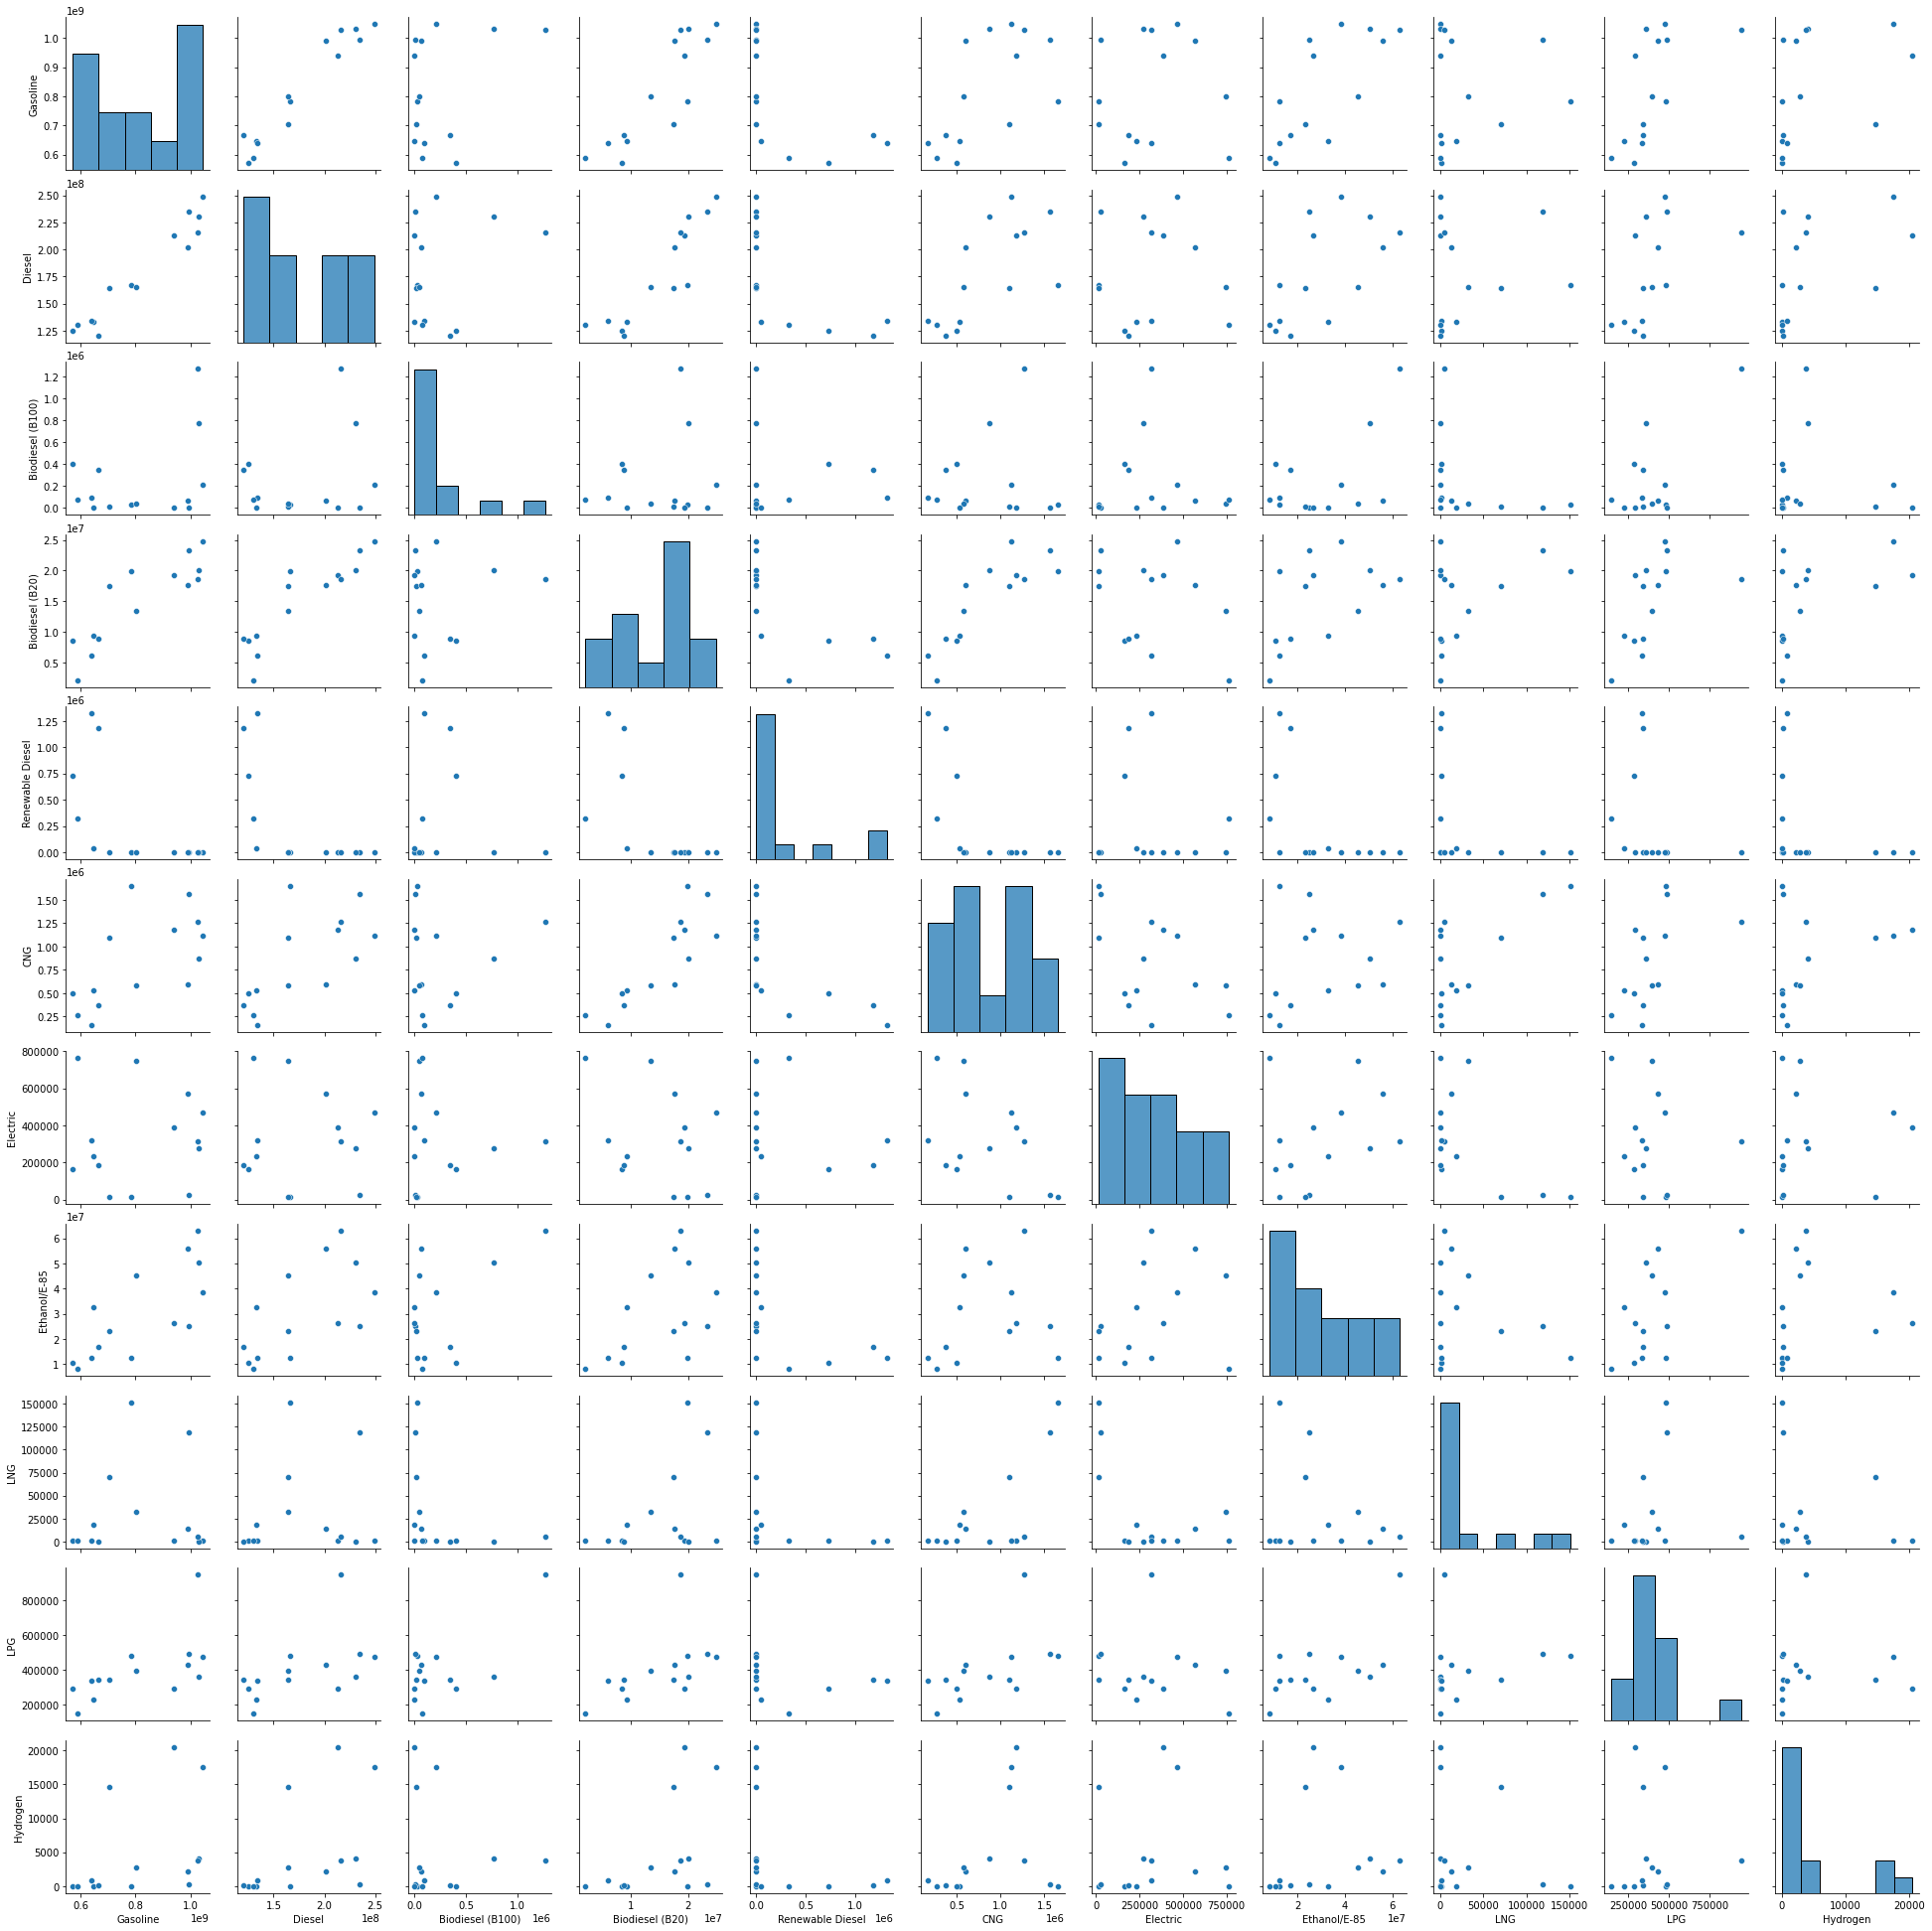

In [60]:
sns.pairplot(FuelCTY_I)

DISTRIBUTION IS NOT NORMAL.

**RUN THE ANALYSIS** <br> df = FuelCTY_M <br> Catagorical IV = 'Fuel Type' and 'Year' <br> Continuous DV = 'value'

**ANOVA** <br> Continuing in R Studio for the purpose of this exercise.

**Download DF as .csv for R Studio Analysis:**

In [ ]:
FuelCTY_M.to_csv(r'C:\Users\moonk\Desktop\SCHOOL\Modules\M10_DSO110C_Final Project\WEEK 4\FuelCTY.csv')